# Loading environment

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import os, sys
import subprocess as sp

Populating the interactive namespace from numpy and matplotlib


# Import of data file

In [2]:
df=pd.DataFrame([])
score_file=r"all_score.sc"

if (os.path.exists(score_file)):
    df1 = pd.read_csv(score_file, sep='\t').dropna()
    df1 = df1[df1.total_score != 'total_score']
    df1 = df1.applymap(lambda x : pd.to_numeric(x,errors='ignore'))
    df = pd.concat([df,df1])
    df['ddg-per-sasa'] = (df['ddG']*1000)/df['sasa']
    df['hb-per-sasa'] = (df['hbonds']*1000)/df['sasa']
    df['bunsh-per-sasa'] = (df['buried_unsat_hbonds']*1000)/df['sasa']
    df['bunsh2-per-sasa'] = (df['buried_unsat_hbonds2']*1000)/df['sasa']

print('Dataset size:', df.shape[0])  

Dataset size: 68


It is recommended to run an AlphaFold2 (or ColabFold) prediction of all monomeric designs to ensure a proper selection. Uncomment the following lines if you want to load your AlphaFold2 data. 

In [3]:
#AF2_file='AF2.csv'
#dico_rmsd={}
#df2 = pd.read_csv(AF_file, sep=';').dropna()
#for idx in df2.index:
#    name=df2.loc[idx,'design']
#    rmsd=df2.loc[idx,'rmsd']
#    dico_rmsd[name]=rmsd
#df['af2rmsd'] = df['description'].map(dico_rmsd)

In [4]:
df = df.sort_values('buried_unsat_hbonds', ascending=True)
df.head(5)

,total_score,buried_unsat_hbonds,buried_unsat_hbonds2,sasa,sc,hbonds,ddG,graft_RMSD,array,seed,description,ddg-per-sasa,hb-per-sasa,bunsh-per-sasa,bunsh2-per-sasa
45,-520.759,0.0,3.0,1302.631,0.680,13.0,-21.675,0.679,3,2,EEH_1.0_06_S2_0002,-16.639401,9.979802,0.0,2.303031
49,-581.388,0.0,3.0,1169.538,0.686,12.0,-20.210,0.694,157,2,ems_bGwo_45_0001_S2,-17.280328,10.260462,0.0,2.565115
39,-472.530,0.0,2.0,1431.111,0.737,13.0,-28.748,0.605,379,1,HEEH_rd4_0758_S1_0002,-20.087890,9.083852,0.0,1.397516
59,-531.380,0.0,5.0,1701.771,0.674,15.0,-20.144,0.557,302,2,4IKGA_S2,-11.837080,8.814347,0.0,2.938116
23,-543.859,0.0,5.0,1381.039,0.729,14.0,-22.451,0.565,228,1,1CM2A_S1,-16.256601,10.137295,0.0,3.620463


# Metrics analysis

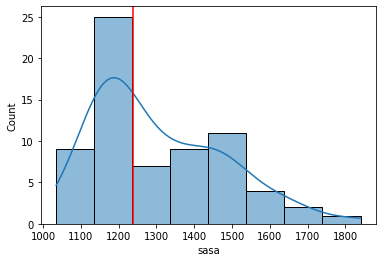

median:1238.7975000000001


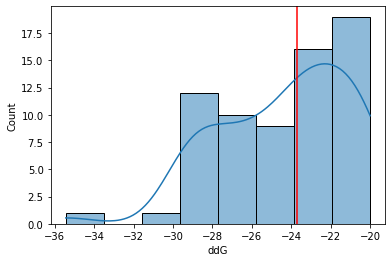

median:-23.712


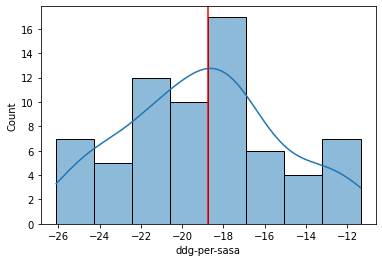

median:-18.737760472819794


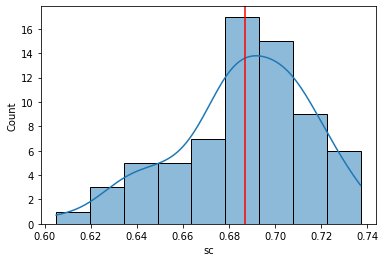

median:0.687


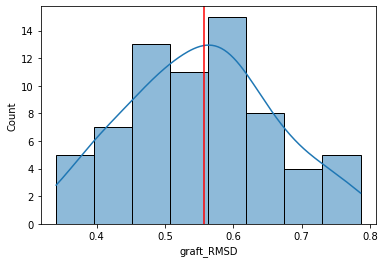

median:0.5565


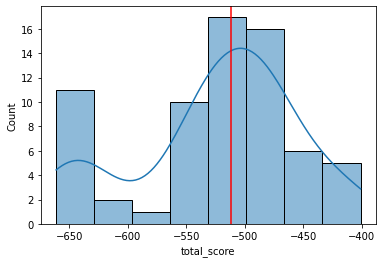

median:-511.34250000000003


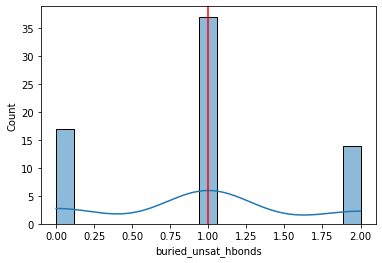

median:1.0


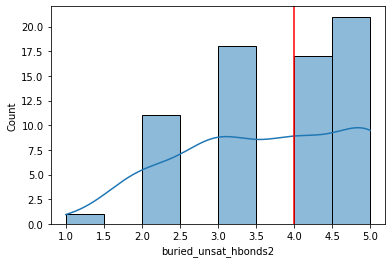

median:4.0


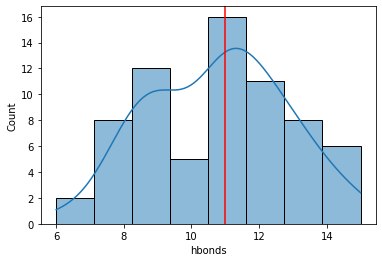

median:11.0


In [5]:
graph1 = sns.histplot(df[df['total_score']<0]['sasa'], kde=True)
graph1.axvline(df['sasa'].median(), color='red')
plt.show()
print('median:'+ str(df['sasa'].median()))

graph3 = sns.histplot(df[df['total_score']<0]['ddG'], kde=True)
graph3.axvline(df['ddG'].median(), color='red')
plt.show()
print('median:'+ str(df['ddG'].median()))

graph4 = sns.histplot(df[df['total_score']<0]['ddg-per-sasa'], kde=True)
graph4.axvline(df['ddg-per-sasa'].median(), color='red')
plt.show()
print('median:'+ str(df['ddg-per-sasa'].median()))

graph5 = sns.histplot(df[df['total_score']<0]['sc'], kde=True)
graph5.axvline(df['sc'].median(), color='red')
plt.show()
print('median:'+ str(df['sc'].median()))

graph6 = sns.histplot(df[df['total_score']<0]['graft_RMSD'], kde=True)
graph6.axvline(df['graft_RMSD'].median(), color='red')
plt.show()
print('median:'+ str(df['graft_RMSD'].median()))

graph7 = sns.histplot(df[df['total_score']<0]['total_score'], kde=True)
graph7.axvline(df['total_score'].median(), color='red')
plt.show()
print('median:'+ str(df['total_score'].median()))

graph8 = sns.histplot(df[df['total_score']<0]['buried_unsat_hbonds'], kde=True)
graph8.axvline(df['buried_unsat_hbonds'].median(), color='red')
plt.show()
print('median:'+ str(df['buried_unsat_hbonds'].median()))

graph9 = sns.histplot(df[df['total_score']<0]['buried_unsat_hbonds2'], kde=True)
graph9.axvline(df['buried_unsat_hbonds2'].median(), color='red')
plt.show()
print('median:'+ str(df['buried_unsat_hbonds2'].median()))

graph10 = sns.histplot(df[df['total_score']<0]['hbonds'], kde=True)
graph10.axvline(df['hbonds'].median(), color='red')
plt.show()
print('median:'+ str(df['hbonds'].median()))

#graph11 = sns.histplot(df[df['total_score']<0]['af2rmsd'], kde=True)
#graph11.axvline(df['af2rmsd'].median(), color='red')
#plt.show()
#print('median:'+ str(df['af2rmsd'].median()))

Total number of designs: 68
{1: 42, 2: 26}


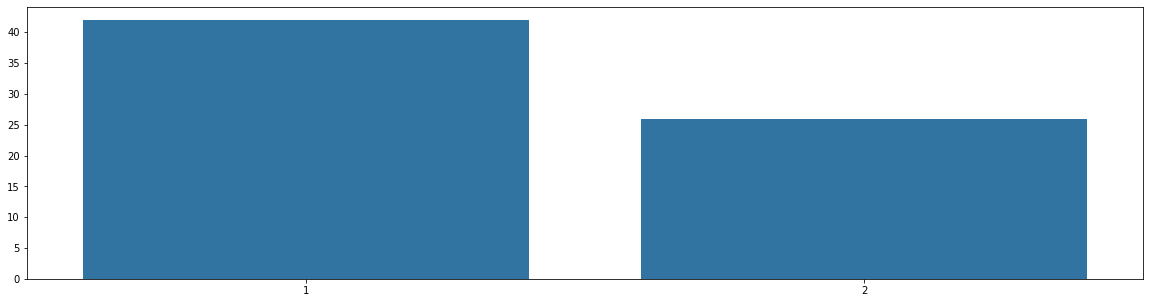

In [6]:
totalseed=df['seed'].max()
dico_nseed={}

for i in range(1,totalseed+1,1):
    subdf=df[df['seed']==i]
    nseed=subdf.shape[0]
    dico_nseed[i]=nseed
print('Total number of designs: {}'.format(df.shape[0]))

fig= plt.figure(figsize=(20,5))
keys = list(dico_nseed.keys())
vals = [dico_nseed[k] for k in keys]
sns.barplot(x=keys, y = vals)
plt.show

print(dico_nseed)

# Selection of best designs

The selection aims to obtain a similar amount of designs per seed, i.e. avoiding one grafted seeds over/under-representation. Therefore, different cutoffs can be set: For one specific seed, if too many designs are selected based on cutoff 1, then cutoff 2 applies, and so on until the number of designs is below the maximum allowed for one seed. However, if the number of designs falls under the minimum, then the previous cutoff is privileged. 

The cutoffs contains important metrics like the dSASA-normalized binding energy (ddG-per-SASA), the shape complementarity (SC), the number of buried unsatisfied polar atoms, the number of interface hydrogen bonds and the buried solvant-accessible surface area. It is advised to set the values empirically according to the number of designs you aim for.

### Setting the cutoffs
Please modify the values of the following block

In [7]:
cutoff1={'ddg-per-sasa': -21.5, 
         'sc': 0.67,
         'buried_unsat_hbonds': 2, 
         'hbonds': 5,
         'sasa': 1200
         #,'af2rmsd': 1
        }

cutoff2={'ddg-per-sasa': -23, 
         'sc': 0.699,
         'buried_unsat_hbonds': 1, 
         'hbonds': 7,
         'sasa': 1270
         #,'af2rmsd': 1
        }

cutoff3={'ddg-per-sasa': -25, 
         'sc': 0.71,
         'buried_unsat_hbonds': 1, 
         'hbonds': 9,
         'sasa': 1335
         #,'af2rmsd': 1
        }

cutoff4={'ddg-per-sasa': -27.7, 
         'sc': 0.73,
         'buried_unsat_hbonds': 1, 
         'hbonds': 10,
         'sasa': 1370
         #,'af2rmsd': 1
        }

cutoff5={'ddg-per-sasa': -30, 
         'sc': 0.72,
         'buried_unsat_hbonds': 0, 
         'hbonds': 11,
         'sasa': 1390
         #,'af2rmsd': 1
        }

mindes=5
maxdes=40

In [8]:
def create_preselection(dico_cutoff, df2, seedid):
    preselect=df2[(df2['ddg-per-sasa']<int(dico_cutoff['ddg-per-sasa'])) &
              (df2['sc']>float(dico_cutoff['sc'])) &
              (df2['buried_unsat_hbonds']<=int(dico_cutoff['buried_unsat_hbonds'])) & 
              (df2['hbonds']>=int(dico_cutoff['hbonds'])) & 
              (df2['sasa']>=int(dico_cutoff['sasa'])) &
              (df2['seed']==int(seedid))
              # & (df2['af2rmsd']<=int(dico_cutoff['af2rmsd']))
              ]
    return preselect

### Making the selection

Seed 1 : cutoff_1 ( 3 )
Seed 2 : cutoff_1 ( 3 )

Number of designs selected: 6

{'None': 0, 'Not passed': 0, 'Cutoff 1': 2, 'Cutoff 2': 0, 'Cutoff 3': 0, 'Cutoff 4': 0, 'Cutoff 5': 0, 'Over': 0}


,total_score,buried_unsat_hbonds,buried_unsat_hbonds2,sasa,sc,hbonds,ddG,graft_RMSD,array,seed,description,ddg-per-sasa,hb-per-sasa,bunsh-per-sasa,bunsh2-per-sasa
1,-436.302,0.0,3.0,1216.499,0.682,8.0,-26.253,0.512,2,1,EEH_1.0_01_S1_0002,-21.580782,6.576249,0.000000,2.466093
36,-509.124,1.0,5.0,1234.326,0.683,9.0,-27.539,0.589,378,1,HEEH_rd4_0024_S1,-22.310962,7.291429,0.810159,4.050794
41,-483.736,2.0,4.0,1243.269,0.681,8.0,-27.954,0.605,379,1,HEEH_rd4_0930_S1,-22.484273,6.434649,1.608662,3.217325
50,-623.719,0.0,4.0,1487.338,0.723,13.0,-35.432,0.397,228,2,1CM2A_S2,-23.822426,8.740448,0.000000,2.689369
60,-653.412,1.0,4.0,1331.050,0.680,11.0,-28.061,0.419,303,2,4JRWA_S2,-21.081853,8.264152,0.751287,3.005146


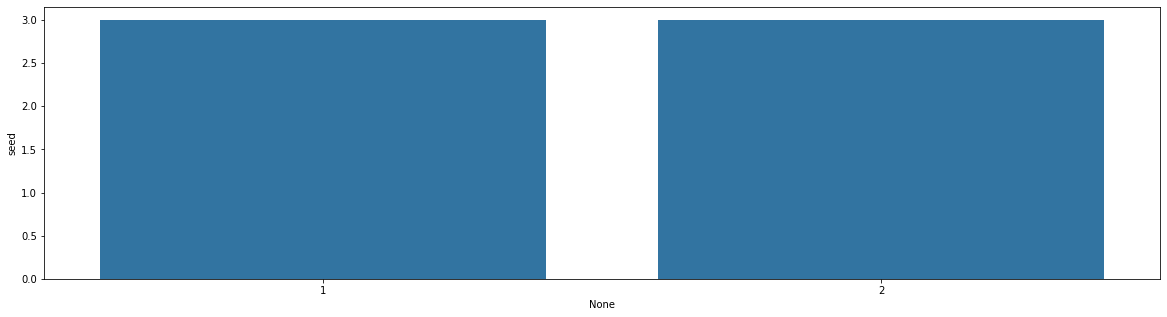

In [9]:
final_select=pd.DataFrame([])
cutoff_counts={'None':0,'Not passed':0, 'Cutoff 1':0, 'Cutoff 2':0, 'Cutoff 3':0,'Cutoff 4':0, 'Cutoff 5':0, 'Over':0}
for i in range(1,totalseed+1,1):
    preselect=df[df['seed']==i]
    
    if dico_nseed[i]==0:
        print('Seed',i,' : no grafted design for this seed')
        cutoff_counts['None']+=1
        continue
        
    if dico_nseed[i]<mindes:
        preselect=df[df['seed']==i]
        final_select = pd.concat([final_select, preselect])
        print('Seed',i,': too few designs => everything taken (',dico_nseed[i],')')
        cutoff_counts['Not passed']+=1
        continue
        
    previous_preselect=preselect
    preselect=create_preselection(cutoff1, df, i)
       
    if (preselect.shape[0] <= maxdes):
        final_select = pd.concat([final_select, preselect])
        print('Seed',i, ': cutoff_1 (',preselect.shape[0],')')
        cutoff_counts['Cutoff 1']+=1
        if(preselect.shape[0]==0):
            cutoff_counts['Not passed']+=1
        continue
    
    previous_preselect=preselect    
    preselect=create_preselection(cutoff2, df, i)
       
    if (preselect.shape[0]<=mindes):
        final_select = pd.concat([final_select, previous_preselect])
        print('Seed',i,': too few designs with cutoff_2 ==> cutoff_1 instead (',previous_preselect.shape[0],')')
        cutoff_counts['Cutoff 1']+=1
        continue
    elif (preselect.shape[0]<=maxdes):
        final_select = pd.concat([final_select, preselect])
        print('Seed',i, ' : cutoff_2 (',preselect.shape[0],')')
        cutoff_counts['Cutoff 2']+=1
        continue
    
    previous_preselect=preselect
    preselect=create_preselection(cutoff3, df, i)
    
    if (preselect.shape[0]<=mindes):
        final_select = pd.concat([final_select, previous_preselect])
        print('Seed',i,': too few designs with cutoff_3 ==> cutoff_2 instead (',previous_preselect.shape[0],')')
        cutoff_counts['Cutoff 2']+=1
        continue
    elif (preselect.shape[0]<=maxdes):
        final_select = pd.concat([final_select, preselect])
        print('Seed',i, ' : cutoff_3 (',preselect.shape[0],')')
        cutoff_counts['Cutoff 3']+=1
        continue
    
    previous_preselect=preselect
    preselect=create_preselection(cutoff4, df, i)
    
    if (preselect.shape[0]<=mindes):
        final_select = pd.concat([final_select, previous_preselect])
        print('Seed',i,': too few designs with cutoff_4 ==> cutoff_3 instead (',previous_preselect.shape[0],')')
        cutoff_counts['Cutoff 3']+=1
        continue
    elif (preselect.shape[0]<=maxdes):
        final_select = pd.concat([final_select, preselect])
        print('Seed',i, ' : cutoff_4 (',preselect.shape[0],')')
        cutoff_counts['Cutoff 4']+=1
        continue
    
    previous_preselect=preselect
    preselect=create_preselection(cutoff5, df, i)
    
    if (preselect.shape[0]<=mindes):
        final_select = pd.concat([final_select, previous_preselect])
        print('Seed',i,': too few designs with cutoff_5 ==> cutoff_4 instead (',previous_preselect.shape[0],')')
        cutoff_counts['Cutoff 4']+=1
        continue
    elif (preselect.shape[0]<=maxdes):
        final_select = pd.concat([final_select, preselect])
        print('Seed',i, ' : cutoff_5 (',preselect.shape[0],')')
        cutoff_counts['Cutoff 5']+=1
        continue
    else:
        print('Seed',i,': too many designs with strictest cutoff (',previous_preselect.shape[0],') !')
        cutoff_counts['Over']+=1
    
    print(preselect.shape[0]) 
        
print('\nNumber of designs selected: {}\n'.format(final_select.shape[0]))

select=final_select

fig= plt.figure(figsize=(20,5))
select_count=final_select['seed'].value_counts().to_frame().sort_index()
sns.barplot(x=select_count.index, y=select_count['seed'])
plt.show

print(cutoff_counts)
select.head(5)

### Copying the selected files

In [69]:
cmd = r"cp "+ ''.join('./out/' + final_select['description'] + ".pdb ") + './selected'
output = sp.run(cmd, shell=True, capture_output=True, text=True)
print(cmd)

cp ./out/EHEE_rd4_0464_S1.pdb ./out/EEEH_3.2_02_S1.pdb ./out/EHEE_rd4_0158_S1.pdb ./out/EHEE_rd4_0938_S1.pdb ./selected
